# Machine Learning
> ## What is AI(Artificial intelligence)?
![AI.png](./Image/AI.png)

> ## What is Machine learning?
> https://study.163.com/course/courseLearn.htm?courseId=1004570029#/learn/video?lessonId=1049052745&courseId=1004570029
> https://study.163.com/course/courseLearn.htm?courseId=1004570029#/learn/video?lessonId=1049050791&courseId=1004570029
> #### Machine learning is to use algorithms to parse data, learn from them, and then make decisions and predictions about real world events.Machine learning uses a lot of data to "train" and learns how to accomplish tasks from data by various algorithms.


> Algoritms:
> 1. KNN(k-nearest neighbors)
> 2. Linear Regression
> 3. Logistic Regression
> 4. Decision Tree
> 5. SVM(Support Vector Machine)
> 6. Naive Bayers
> 7. PCA(Principal Component Analysis)
> 8. K-means
> 9. Ensemble Learning(Boosting,Bagging,Random Forest)
> ......

> ### What is Deep learning?
> __Deep learning is a technology to realize machine learning.__

>  Deep learning is not an independent learning method, and it also uses supervised and unsupervised learning methods to train deep neural networks. However, due to the rapid development of this field in recent years, some unique learning methods have been proposed one after another (such as residual network), so more and more people regard it as a learning method alone.

> The main feature of deep learning is to build a neural network model.
> Neural Network:
> 1. CNN(Convolutional Neural Network)
> 2. RNN(Recurrent Neural Network)
> 3. LSTM RNN(Long Short-Term Memory)
> 4. GAN(Generative Adversarial Nets)
> 5.  .....

## Overfitting and Underfitting

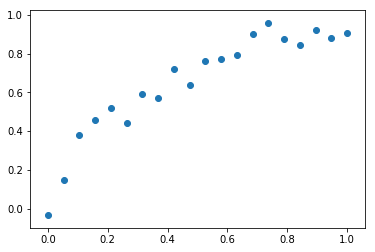

In [2]:
import numpy as np
import matplotlib.pyplot as plt
n_dots = 20
x = np.linspace(0,1,n_dots)
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1
plt.scatter(x,y)
plt.show()

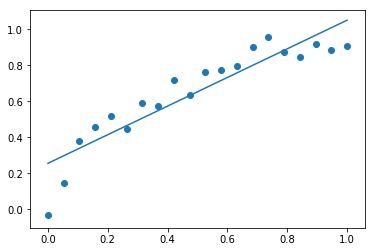

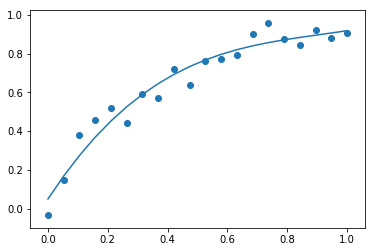

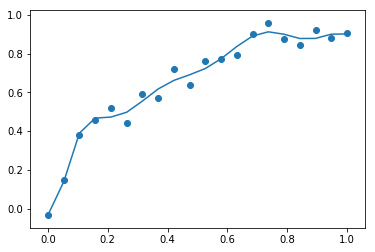

In [6]:
z1 = np.polyfit(x,y,1)
z2 = np.polyfit(x,y,3)
z3 = np.polyfit(x,y,10)
plt.figure()
plt.scatter(x,y)
plt.plot(x,x*z1[0]+z1[1])
plt.figure()
plt.scatter(x,y)
plt.plot(x,x*x*x*z2[0]+x*x*z2[1]+x*z2[2]+z2[3])
plt.figure()
plt.scatter(x,y)
t = 10
y0 = 0
for z in z3:
    y0 = y0 + z*x**t
    t = t-1
plt.plot(x,y0)
plt.show()


## Cost Function

> Cost function is the function relationship about the cost and model parameters.![20180110185744396458.jpg](./Image/cost.png)

## Accuracy

> ### Model performance.
> * Cost Function is the most intuitive indicators for evaluating a model.The smaller the value,the better the model(except overfitting).
> * We can also use the interface of model `score()`([0,1]) to show model's performance.The higher the score,the better the model.

> ### Cross Validation.
> Cross validation is to ensure that data is not seen by models.
> It will split datasets to three parts:
> * Train datasets.
> * Test datasets.
> * Cross validation datasets.

## Learning curve

In [2]:
import numpy as np
n_dots = 200
X = np.linspace(0,1,n_dots)
y = np.sqrt(X) + 0.2*np.random.rand(n_dots) - 0.1
# Matrix: n_sample * n_feature
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [6]:
# We need create Multi-models,so we use Pipeline!
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynoimal_model(degree = 1): # n degrees represent n models
    polynoimal_features = PolynomialFeatures(degree = degree,include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynoimal_features",polynoimal_features),("linear_regression",linear_regression)])
    return pipeline


In [12]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs = 1,train_sizes=np.linspace(.1,1.0,5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='r')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label = 'Training score')
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label = "Cross-validation score")
    plt.legend(loc = 'best')
    return plt

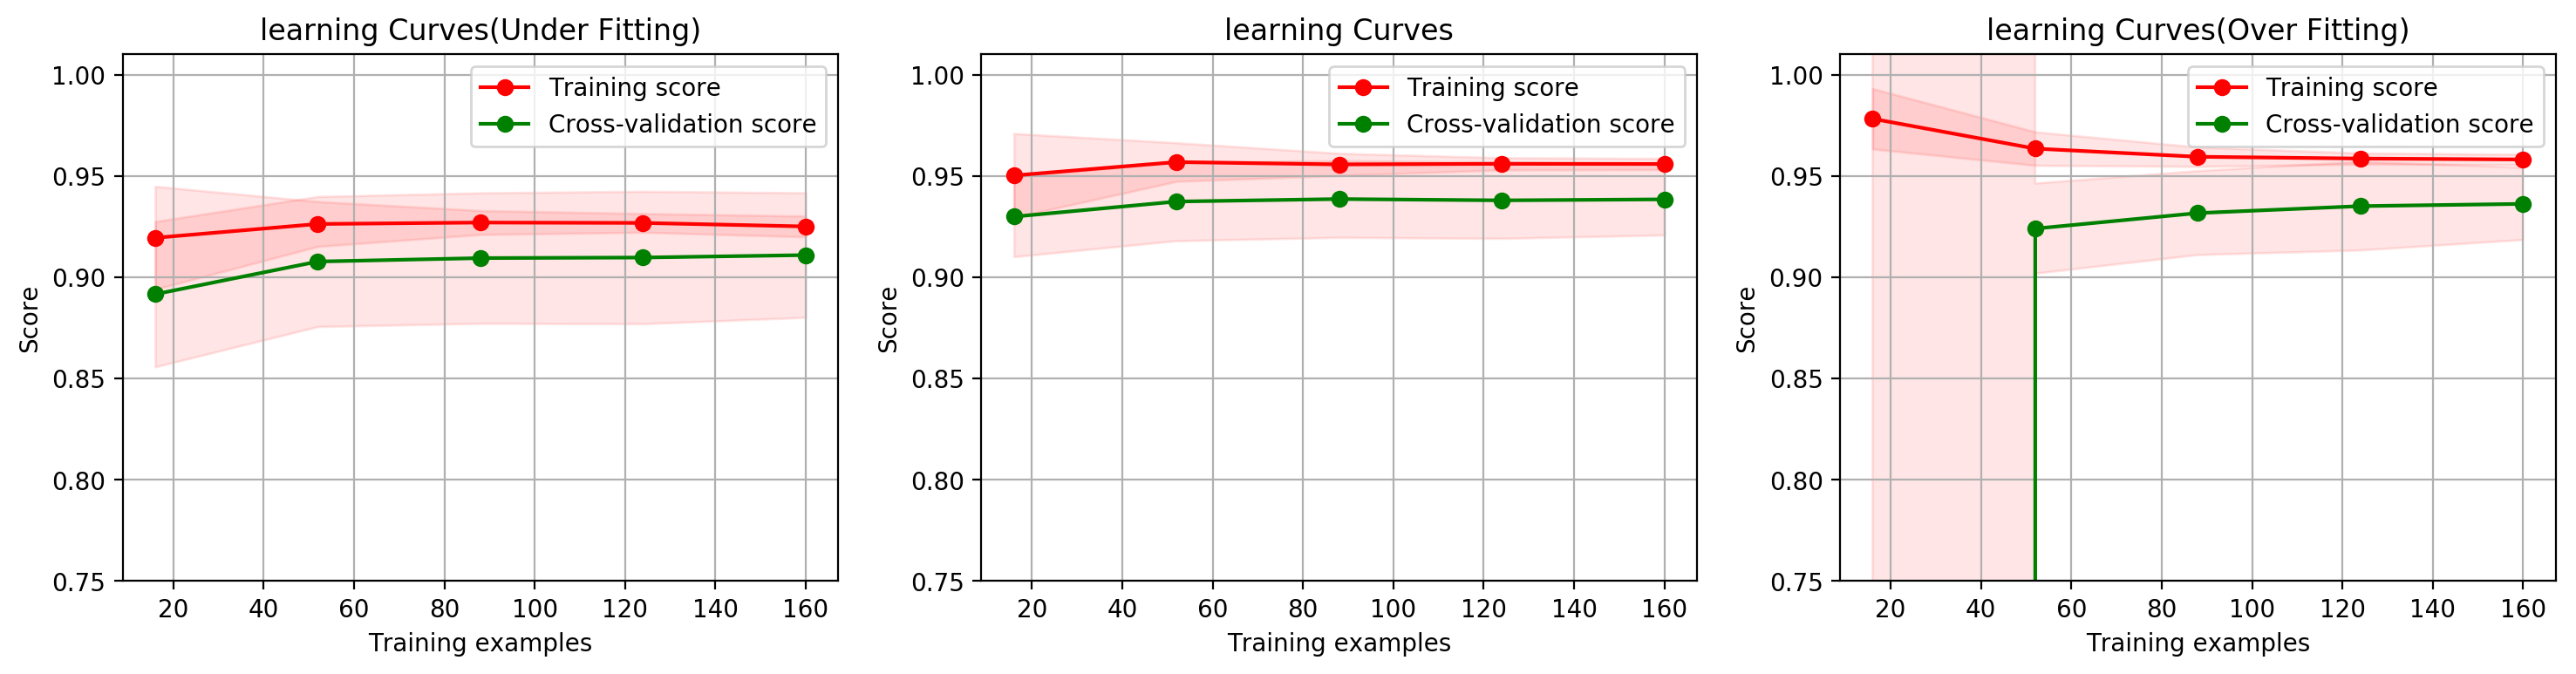

In [13]:
import matplotlib.pyplot as plt
cv = ShuffleSplit(n_splits=10,test_size = 0.2,random_state=0)
titles = ['learning Curves(Under Fitting)',
          'learning Curves','learning Curves(Over Fitting)']
degrees = [1,3,10]
plt.figure(figsize=(18,4),dpi=200)
for i in range(len(degrees)):
    plt.subplot(1,3,i+1)
    plot_learning_curve(polynoimal_model(degrees[i]),titles[i],X,y,ylim=(0.75,1.01),cv=cv)
plt.show()

### Algorithm Model Optimization

> Overfitting:
> * Obtain more train datas.
> * Reduce the input features.
>
> Underfitting:
> * Increase valuable features.
> * Increase polynomial characteristics.

|------| ActualTrue | ActualFalse |
|------|------------|-------------|
|PreTrue|TruePosition|FalsePosition|
|PreFalse|FalseNegative|TrueNegative|

 $$Precision = \frac{TruePosition}{TruePosition+FalsePositive}$$
 $$Recall = \frac{TruePosition}{TruePosition+FalseNegative}$$

$$ F_1Score = 2\frac{PR}{P+R} $$
    __sklearn.metrics.f1_score()__